In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [17]:
def loadRawData(filename, nrows):
    return pd.read_parquet(filename)[:nrows]


def selectColumns(dataframe, columns):
    newDataframe = dataframe.copy()
    return newDataframe[columns]


def removeNullValues(dataframe):
    dataframe.dropna(axis=0, inplace=True)


data = loadRawData('recipes.parquet', 100)

keepColumns = ['Name',
               'CookTime', 'PrepTime', 'TotalTime', 
               'RecipeCategory', 
               #'RecipeIngredientQuantities', 
               'RecipeIngredientParts',
               'RecipeInstructions']
reducedData = selectColumns(data, keepColumns)

removeNullValues(reducedData.drop('CookTime', axis=1))

In [18]:
reducedData.head()

,Name,CookTime,PrepTime,TotalTime,RecipeCategory,RecipeIngredientParts,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Frozen Desserts,"[blueberries, granulated sugar, vanilla yogurt...","[Toss 2 cups berries with sugar., Let stand fo..."
1,Biryani,PT25M,PT4H,PT4H25M,Chicken Breast,"[saffron, milk, hot green chili peppers, onion...",[Soak saffron in warm milk for 5 minutes and p...
2,Best Lemonade,PT5M,PT30M,PT35M,Beverages,"[sugar, lemons, rind of, lemon, zest of, fresh...","[Into a 1 quart Jar with tight fitting lid, pu..."
3,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,Soy/Tofu,"[extra firm tofu, eggplant, zucchini, mushroom...","[Drain the tofu, carefully squeezing out exces..."
4,Cabbage Soup,PT30M,PT20M,PT50M,Vegetable,"[plain tomato juice, cabbage, onion, carrots, ...","[Mix everything together and bring to a boil.,..."


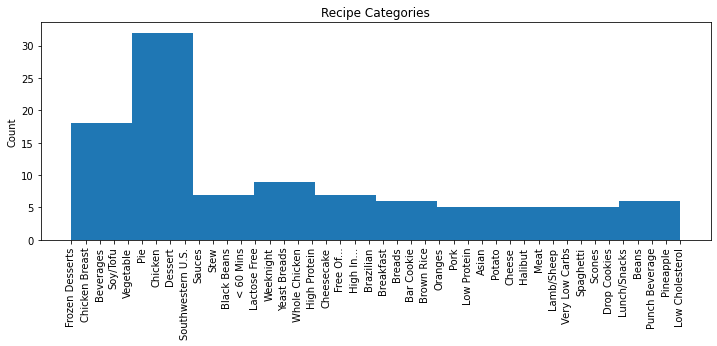

In [25]:
plt.figure(figsize=(12, 4))
plt.hist(reducedData['RecipeCategory'])
plt.title('Recipe Categories')
plt.ylabel('Count')
plt.xticks(rotation=90);

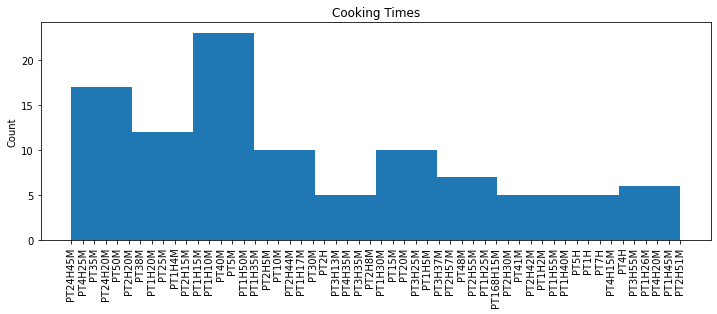

In [27]:
plt.figure(figsize=(12, 4))
plt.hist(reducedData['TotalTime'])
plt.title('Cooking Times')
plt.ylabel('Count')
plt.xticks(rotation=90);